In [1]:
import pandas as pd

## Lookup

### Interaction type
125, 126 => GCDC submitted

In [2]:
interaction_type = pd.read_csv("InteractionType.csv", index_col=0)
interaction_type.set_index("Code")

,Desc
Code,
0,Page view
1,Click
19,Content from Gatedcontent
20,Download
21,Anchor
22,JavaScript link click
23,mailto: click
24,off-site link click
25,Right-click download


### eventlist

In [3]:
all_eventlist = pd.read_csv("all_eventlist.csv", index_col=0)
all_eventlist.columns = ["Code+"]
all_eventlist["Code"] = (all_eventlist["Code+"].apply(lambda x: x.split("=")[0])).astype(int)
all_eventlist["Value"] = all_eventlist["Code+"].apply(lambda x: x.split("=")[1] if "=" in x else None)

In [4]:
eventsInfo = all_eventlist.merge(interaction_type, how="left", on="Code")

In [5]:
eventsInfo["Code"].unique()

array([  100, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027,
       10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036,
       10037, 10038, 10039, 10040, 10041, 10042,   101,   102,   103,
         104,   105,   106,   107,   108,   109,   110,   111,   112,
         113,   114,   115,   116,   117,   119,   120,   121,   122,
         123,   124,   125,   127,   128,   129,   130,   131,   132,
         133,   134,   139,   140,   141,   142,   144,   145,   146,
         147,   149,   153,   159,   160,   161,   162,   165,   166,
         167,   168,   169,   170,   175,   176,   177,   179,   180,
         181,   182,   183,   184,   185,   186,   187,   188,   189,
         190,   191,   192,   193,    20,   200, 20101, 20102,   201,
         202,   203,   204,   205,   206,   207,   208,   209,   210,
         211,   212,   213,   214,   215,   216,   217,   219,   220,
         239,   240,   241,   249,   259,   260,   262,   263,   264,
         265,   269,

In [6]:
eventsInfo[eventsInfo["Code"].isin([701,700])]

,Code+,Code,Value,Desc
5807,700,700,None,NaN
5808,701,701,None,NaN


In [7]:
eventsInfo[eventsInfo.Value.isnull()]

,Code+,Code,Value,Desc
0,100,100,None,Email Address Identified
1,10020,10020,None,NaN
2,10021,10021,None,NaN
3,10022,10022,None,NaN
4,10023,10023,None,NaN
...,...,...,...,...
5804,504,504,None,NaN
5805,505,505,None,NaN
5806,506,506,None,NaN
5807,700,700,None,NaN


## Utils

In [136]:
def get_summary(table, field):
    print("nan ratio:", table[field].isnull().sum()/table.shape[0])
    print("nan rows: ", table[field].isnull().sum())
    print(table[field].fillna("nan").value_counts())
    
def email_cleanup(table, key="emailaddress1"):
    if key not in table.columns:
        raise "key is not in table.columns"
    table = table.dropna(subset=[key]) # remove nan
    table.loc[:, key] = table[key].str.replace("'", "").str.lower() # lower case, clean single quote
    table = table[(~table[key].str.contains("rockwell|pisrc|bounteous|test"))] # remove rockwell related email
    return table

## CRM.Lead table 

In [138]:
_lead = pd.read_csv("crm_Lead_20221116_all.csv", index_col=0)
crm_lead = email_cleanup(_lead, "emailaddress1")

/Users/wy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,9,13,15,17,31,43,44,45,46,49,50,51,56,58,59,63,64,68,70,72,74,76,78,81,83,84,85,89,92,94,97,99,109,112,113,114,115,117,124,135,136,137,138,140,142,143,144,145,157,159,164,165,166,167,178,182,185,188,198,200,204,207,208,216,217,219,223,224,229,230,232,238,240,246,247,252,253,256,257,258,261,262,266,267,268,272,274,275,284,286,287,289,293,294,307,311,313) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/wy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilo

In [137]:
crm_lead.shape

(183763, 313)

In [13]:
# BIANGE_START = "2022-04-21"
# crm_lead[crm_lead["modifiedon"] >= BIANGE_START] # this filter should not apply to crm lead table, it should apply to AEM raw data. 
# crm_lead["createdon"].min()
# crm_lead["modifiedon"].astype(str)

In [14]:
# crm_lead.dropna(thresh=150).head(10).style

#### email checking


In [15]:
crm_emails = crm_lead[["emailaddress1","emailaddress2","emailaddress3"]].dropna(axis=1, how='all')
# crm_emails[["emailaddress2"]].dropna()
# crm_emails[["emailaddress3"]].dropna()
# crm_lead[["emailaddress1","ra_lmpowneremail"]].dropna()

#### sales label data

In [16]:
view = crm_lead.groupby("emailaddress1")[["ra_datesalesaccepted",
        "ra_datesalesqualified",
        "ra_dateteleaccepted",
        "ra_datetelequalified",
        "ra_businessprocess"]].count()
view["sum"] = view.sum(axis=1)
view[view["sum"]>5].sort_values(by="sum")
view[view["sum"]==5]

,ra_datesalesaccepted,ra_datesalesqualified,ra_dateteleaccepted,ra_datetelequalified,ra_businessprocess,sum
emailaddress1,,,,,,
012k.yamazaki@tam-tokyo.co.jp,1,1,1,1,1,5
13621756338@163.com,1,1,1,1,1,5
13847249168@126.com,0,5,0,0,0,5
13934910896@163.com,2,1,0,0,2,5
1541erushing@gmail.com,2,1,0,2,0,5
...,...,...,...,...,...,...
zmiksitz@ghargrove-epc.com,1,1,1,1,1,5
zoier@elektrotechnik-green.com,1,1,1,1,1,5
zrevis@casindustries.com,1,1,1,1,1,5


In [17]:
# view = crm_lead.groupby("emailaddress1")[["ra_teleaccepted",
# "ra_teleacceptedname",
# "ra_teledisqualifyreason",
# "ra_teledisqualifyreasonname",
# "ra_telequalified",
# "ra_telerejectionreason",
# "ra_telerejectionreasonname",
# "ra_telerep",
# "ra_telerepname",
# "ra_wasteleperformed",
# "ra_wouldyoulikefurthercontact",
# "ra_wouldyoulikefurthercontactname",]].count()
# view

In [18]:
rows = crm_lead.shape[0]

In [19]:
def get_summary(crm_lead, cols = ["ra_salesaccepted"], by=["ra_salesacceptedname"]):
    cols = cols + by
    a = crm_lead[cols].fillna("NAN").groupby(by).size().rename("count").to_frame()
    a.loc[:,"sep"] = "||"
    a["ratio"] = (a["count"]/a["count"].sum()).round(3)
    a = a.sort_values(by="ratio", ascending=False)
    return a

In [20]:
get_summary(crm_lead, cols = ["ra_salesaccepted"], by=["ra_salesacceptedname"])

,count,sep,ratio
ra_salesacceptedname,,,
NAN,87907,||,0.478
Yes,52939,||,0.288
No,42917,||,0.234


In [21]:
get_summary(crm_lead, cols = ["ra_teleaccepted"], by=["ra_teleacceptedname"])

,count,sep,ratio
ra_teleacceptedname,,,
NAN,131648,||,0.716
Yes,36573,||,0.199
No,15109,||,0.082
Pending,433,||,0.002


In [22]:
get_summary(crm_lead, cols = ["ra_teledisqualifyreason"], by=["ra_teledisqualifyreasonname"])

,count,sep,ratio
ra_teledisqualifyreasonname,,,
NAN,161894,||,0.881
Max Attempts,10593,||,0.058
No Interest,8899,||,0.048
Bad Contact Information,1174,||,0.006
Not Decision Maker,801,||,0.004
Not Buying Location,401,||,0.002
False,1,||,0.000


In [23]:
get_summary(crm_lead, cols = ["ra_telerejectionreason"], by=["ra_telerejectionreasonname"])

,count,sep,ratio
ra_telerejectionreasonname,,,
NAN,168306,||,0.916
Does not meet campaign criteria,14389,||,0.078
Insufficient information to contact,1067,||,0.006
Lead Routed Successfully.,1,||,0.000


In [24]:
get_summary(crm_lead, cols = ["ra_wouldyoulikefurthercontact"], by=["ra_wouldyoulikefurthercontactname"])

,count,sep,ratio
ra_wouldyoulikefurthercontactname,,,
NAN,140404,||,0.764
Yes,33350,||,0.181
No,10008,||,0.054
1,1,||,0.000


In [25]:
# crm_lead[["ra_telerep",
# "ra_telerepname",
# "ra_wasteleperformed"]].drop_duplicates()

#### code

In [26]:
# crm_lead[["salesstage", "salesstagecode", "salesstagecodename"]].drop_duplicates().sort_values(by="salesstagecode") # ignore
# crm_lead[["ra_zsalesacceptancestageentered"]].drop_duplicates() # ignore
# crm_lead[["salutation"]].drop_duplicates() # ignore
# crm_lead[["schedulefollowup_qualify"]].drop_duplicates() # ignore

In [27]:
crm_lead[["ra_leadstagename", "ra_leadstage"]].drop_duplicates().sort_values(by="ra_leadstage")

,ra_leadstagename,ra_leadstage
1494.0,Unassigned,1.0
1.0,Awaiting Tele Acceptance,2.0
154.0,Awaiting Tele Qualification,3.0
0.0,Awaiting Sales Acceptance,4.0
2.0,Awaiting Sales Qualification,5.0
65.0,Distributor Lead,6.0
725.0,Qualified,7.0
182685.0,External Lead,8.0
5200.0,NaN,NaN


In [28]:
get_summary(crm_lead, cols = ["ra_leadstage"], by=["ra_leadstagename"])

,count,sep,ratio
ra_leadstagename,,,
Awaiting Sales Qualification,76918,||,0.419
Awaiting Sales Acceptance,58935,||,0.321
Awaiting Tele Qualification,25347,||,0.138
Awaiting Tele Acceptance,17928,||,0.098
Unassigned,2563,||,0.014
Qualified,1537,||,0.008
Distributor Lead,479,||,0.003
External Lead,39,||,0.000
NAN,17,||,0.000


In [29]:
crm_lead.groupby("emailaddress1").size().sort_values()

emailaddress1
01032409699@nate.com             1
mglastetter@rocktenn.com         1
mgiublin@gmail.com               1
mgiroux@butterball.com           1
mgirardis65@gmail.com            1
                                ..
alovati@cosmopharma.com         50
idy1983@163.com                 52
pingpingzh@126.com              54
jerry_li@lincolnelectric.com    62
nnleong@ra.rockwell.com         93
Length: 135291, dtype: int64

In [30]:
crm_lead[["statecodename", "statecode"]].dropna().drop_duplicates()

,statecodename,statecode
0.0,Open,0
1.0,Disqualified,2
88.0,Qualified,1
233472.0,Disqualified,2
233473.0,Open,0
233505.0,Qualified,1


In [31]:
get_summary(crm_lead, cols = ["statecode"], by=["statecodename"])

,count,sep,ratio
statecodename,,,
Disqualified,129947,||,0.707
Open,29235,||,0.159
Qualified,24580,||,0.134
NAN,1,||,0.000


##### positive signal 
- Qualified == 3.0
- 953810011.0 == Already Active Opportunity
- 953810008.0 == Assigned to Distribution


In [32]:
crm_lead[["statuscode", "statuscodename"]].drop_duplicates().sort_values(by="statuscode")

,statuscode,statuscodename
0.0,1.0,New
88.0,3.0,Qualified
70.0,4.0,Not buying or influence location
1031.0,5.0,Credit hold or watch
68.0,6.0,Not Decision Maker
72.0,7.0,No Interest
182.0,953810000.0,No RA solution
360.0,953810001.0,Selling barrier to high
718.0,953810002.0,Competitor/Non RA distributor
146.0,953810003.0,"Unable to make contact (via phone,email)"


In [33]:
get_summary(crm_lead, cols = ["statuscode"], by=["statuscodename"])

,count,sep,ratio
statuscodename,,,
New,29235,||,0.159
Qualified,24580,||,0.134
No buying intention,19463,||,0.106
No Interest,18332,||,0.100
Does not meet campaign criteria,16937,||,0.092
Already Active Opportunity,14342,||,0.078
Max Attempts,10567,||,0.058
Duplicate Lead,7744,||,0.042
Unable to make contact,6081,||,0.033


#### checking case

In [140]:
a = crm_lead[["emailaddress1","createdon", "ra_leadstage", "ra_leadstagename", "statecode", "statecodename", "statuscode", "statuscodename"]].sort_values(by=['emailaddress1', 'createdon'])
user_journey = a.groupby("emailaddress1").size().sort_values().iloc[-10::].index
a.groupby("emailaddress1").size().sort_values().iloc[-50::]
a[a["ra_leadstage"]>5].groupby("emailaddress1").size().sort_values().iloc[-50::]
track = a[a["emailaddress1"].isin(['vprakash@prosoft-technology.com'])]
track.style

,emailaddress1,createdon,ra_leadstage,ra_leadstagename,statecode,statecodename,statuscode,statuscodename
7250.0,vprakash@prosoft-technology.com,2021-11-19 00:30:25,3.000000,Awaiting Tele Qualification,2,Disqualified,953810019.000000,Admin Only: Abandoned by Sales
219625.0,vprakash@prosoft-technology.com,2022-02-17 22:41:47,7.000000,Qualified,0,Open,1.000000,New
219537.0,vprakash@prosoft-technology.com,2022-02-18 09:43:41,7.000000,Qualified,0,Open,1.000000,New
199751.0,vprakash@prosoft-technology.com,2022-02-18 09:45:22,7.000000,Qualified,0,Open,1.000000,New
210021.0,vprakash@prosoft-technology.com,2022-02-18 09:45:55,7.000000,Qualified,0,Open,1.000000,New
219556.0,vprakash@prosoft-technology.com,2022-02-18 09:46:30,7.000000,Qualified,0,Open,1.000000,New


In [146]:
a = crm_lead[["ra_leadstage", "ra_leadstagename", "statecode", "statecodename", "statuscode", "statuscodename"]].drop_duplicates().sort_values(by=['statecode', 'ra_leadstage'])
# a.to_excel("unique_combination.xlsx")

In [35]:
# a[a["ra_leadstagename"] == "Qualified"]

In [36]:
def identify_pos(track, label_type = 2):
    if label_type == 1:
        pos_code_statuscode = [953810011.0, 3.0, 953810008.0]
        isPos = track["statuscode"].isin(pos_code_statuscode).any()
    elif label_type == 2:
        pos_code_ra_leadstage = [6.0, 7.0, 8.0]
        isPos = track["ra_leadstage"].isin(pos_code_ra_leadstage).any()
    return isPos * 1

# identify_pos(track, label_type = 2)

In [37]:
email_to_label = crm_lead.groupby("emailaddress1").apply(lambda track: identify_pos(track, label_type = 2))
email_to_label = email_to_label.to_frame().reset_index()
email_to_label.columns = ["emailaddress1", "label"]

## AEM.Raw


#### Full raw 100000
- 0.1% retaining

In [38]:
# binge2 = pd.read_csv("all_binge_data.csv", nrows=100000, index_col=0)
# print(binge2.shape)
# binge2.head().style

In [39]:
aem_raw_all = pd.read_csv("all_binge_data_TOP1000000_2022-10-16.csv", nrows=1000000, index_col=0)

/Users/wy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17,21,22,23,61,62,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [40]:
print(aem_raw_all.shape)
a = aem_raw_all["BingeId"].isnull().value_counts()
b = aem_raw_all["EloquaContactId"].isnull().value_counts()
c = aem_raw_all["BingeScoredAssetPath"].isnull().value_counts()
d = aem_raw_all["mcvisid"].isnull().value_counts()
summary = pd.concat([a,b,c,d], axis=1).T
summary.columns = ["Null", "not Null"]
summary

(1000000, 67)


,Null,not Null
BingeId,997904.0,2096.0
EloquaContactId,736778.0,263222.0
BingeScoredAssetPath,997870.0,2130.0
mcvisid,NaN,1000000.0


##### journey track

In [41]:
a = aem_raw_all.groupby("mcvisid").size().sort_values()

In [42]:
a.describe()

count    70896.000000
mean        14.105168
std         41.153943
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       1601.000000
dtype: float64

In [43]:
a.index[65600]

'26516953583209154431416858920906482507'

In [44]:
aem_raw_all[aem_raw_all["mcvisid"] == "02324197134454111151602909572031118250"].sort_values(by=["DateTime_UTC", "VisitStartDateTime"]).to_excel("mcvisid_track1.xlsx")
aem_raw_all[aem_raw_all["mcvisid"] == "26516953583209154431416858920906482507"].sort_values(by=["DateTime_UTC", "VisitStartDateTime"]).to_excel("mcvisid_track2.xlsx")

In [45]:
b = aem_raw_all.groupby("mcvisid")["SessionVisitorId"].apply(lambda x: len(x.unique()))

In [46]:
b.sort_values()

mcvisid
46032854560618063633557815284673134672     1
61488328428629650440677444591548438655     1
61488420175431752860432866113102779169     1
61489816163770847211119924999507917631     1
61490178571800567643980162829949215941     1
                                          ..
30645488989520675910382855294504284625     1
30645055229949514003817326299394164883     1
30644468918820665501621400323547144841     1
30651977238467856530109915336899067865     1
00000000000000000000000000000000000000    18
Name: SessionVisitorId, Length: 70896, dtype: int64

##### no bingeID but have asset path

In [47]:
check1 = aem_raw_all[["BingeScoredAssetPath", "BingeId", "mcvisid"]].dropna(subset=["BingeScoredAssetPath", "BingeId"], how="all")
check1[check1["BingeId"].isnull()]

,BingeScoredAssetPath,BingeId,mcvisid
19478,/content/dam/rockwell-automation/videos/produc...,NaN,68859128337061765822116382257023884327
19479,/content/dam/rockwell-automation/videos/produc...,NaN,68859128337061765822116382257023884327
19480,/content/dam/rockwell-automation/videos/produc...,NaN,68859128337061765822116382257023884327
19481,/content/dam/rockwell-automation/videos/produc...,NaN,68859128337061765822116382257023884327
19482,/content/dam/rockwell-automation/videos/produc...,NaN,68859128337061765822116382257023884327
...,...,...,...
993068,/content/dam/rockwell-automation/videos/capabi...,NaN,08784422799731736591031898179989807521
993069,/content/dam/rockwell-automation/videos/capabi...,NaN,08784422799731736591031898179989807521
993070,/content/dam/rockwell-automation/videos/capabi...,NaN,08784422799731736591031898179989807521
993071,/content/dam/rockwell-automation/videos/capabi...,NaN,08784422799731736591031898179989807521


##### no EloquaContactId but have asset path

In [48]:
check1 = aem_raw_all[["EloquaContactId", "BingeScoredAssetPath", "mcvisid"]].dropna(subset=["BingeScoredAssetPath", "EloquaContactId"], how="all")
check1[check1["EloquaContactId"].isnull()]

,EloquaContactId,BingeScoredAssetPath,mcvisid
10276,NaN,/content/rockwell-automation/www/na/us/en_US/c...,81952720634607824223658823577840277611
10277,NaN,/content/rockwell-automation/www/na/us/en_US/c...,81952720634607824223658823577840277611
10278,NaN,/content/rockwell-automation/www/na/us/en_US/c...,81952720634607824223658823577840277611
10279,NaN,/content/rockwell-automation/www/na/us/en_US/c...,81952720634607824223658823577840277611
10280,NaN,/content/rockwell-automation/www/na/us/en_US/c...,81952720634607824223658823577840277611
...,...,...,...
875990,NaN,/content/rockwell-automation/www/na/us/en_US/c...,29692293856429500814046606445145848114
883052,NaN,/content/rockwell-automation/www/na/us/en_US/c...,18166174918272103673948388428450888406
883053,NaN,/content/rockwell-automation/www/na/us/en_US/c...,18166174918272103673948388428450888406
883054,NaN,/content/rockwell-automation/www/na/us/en_US/c...,18166174918272103673948388428450888406


In [49]:
16331528 * 6

97989168

In [50]:
aa = aem_raw_all[["mcvisid", "SessionVisitorId","EloquaContactId","BingeId","BingeScoredAssetPath"]].drop_duplicates()

In [51]:
aa

,mcvisid,SessionVisitorId,EloquaContactId,BingeId,BingeScoredAssetPath
0,72595690133936663160292860666953712690,5245371081881420306_5436457652188793738,NaN,NaN,NaN
1,77714304185955939063778539632941599593,1837527585483185191_3545304300738306081,NaN,NaN,NaN
4,31327108748867797613512628149341223444,9130180625999720287_7707441908567629946,CRACP000015937995,NaN,NaN
6,80229352249323843001060818790712393170,2874905042957312281_8480812610190790383,NaN,NaN,NaN
7,48482653042665222840200568980679483738,4604760640910031723_3933263686619355732,NaN,NaN,NaN
...,...,...,...,...,...
999970,12898681476044687402546428918418222919,2792419121459286031_7422916688330561288,NaN,NaN,NaN
999994,11165162638266352342576568776531471922,5053840686912935399_7002271371251728040,NaN,NaN,NaN
999995,01093325041421648433783816430977626022,8106855766030034010_309094906320338180,NaN,NaN,NaN
999998,11535472783166820511371056241290113550,2991983178088870356_2108138124437241437,NaN,NaN,NaN


#### key filters


In [52]:
keys = pd.read_csv("../db/aemRaw_keyFilters.csv", index_col=None)
print(keys.shape)


(63596, 5)


In [53]:
keys.nunique()

SessionVisitorId        63596
EloquaContactId             0
mcvisid                 63531
BingeId                     0
BingeScoredAssetPath        0
dtype: int64

In [54]:
keys.groupby("mcvisid")["SessionVisitorId"].size()

mcvisid
00000000000000000000000000000000000000    66
00000518780481190052190649702915615655     1
00001799796998934764352220353151395722     1
00002145120154554531139316634729224733     1
00002982068269354423327570655508755674     1
                                          ..
92229895985769940773056726048588041806     1
92229948051429417472539968944320582394     1
92230872168140106332622104064429018702     1
92231211330154795511632611533382123790     1
92232505984643383753826769780913541056     1
Name: SessionVisitorId, Length: 63531, dtype: int64

#### statistics 1 month

In [55]:
stat = pd.read_csv("aemRaw-Stat-2022-10-21.csv", index_col=0)
print(stat.shape)

stat.head().style

/Users/wy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/wy/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(16331528, 7)


,SessionVisitorId,VisitStartDateTime,UploadedAt,BingeId,BingeName,BingeScoredAssetPath,EloquaContactId
0,3803170677156280207_809401068632033196,2022-11-21 05:59:57,2022-11-21 16:06:37.297,nan,nan,nan,nan
1,3803170677156280207_809401068632033196,2022-11-21 05:59:57,2022-11-21 16:06:37.297,nan,nan,nan,nan
2,4097296439880734128_8742565876895011426,2022-11-21 05:59:55,2022-11-21 16:06:37.297,nan,nan,nan,nan
3,9062063676934837992_4367245700631016546,2022-11-21 05:59:49,2022-11-21 16:06:37.297,nan,nan,nan,nan
4,8126527309671879179_5197200247551768646,2022-11-21 05:59:49,2022-11-21 16:06:37.297,nan,nan,nan,nan


In [56]:
rows = stat["BingeId"].shape[0]
count_null = stat["BingeId"].isnull().sum()
count = rows - count_null
ratio = count/rows
ratio_null = 1 - ratio

print("count: ", count)
print("count_null: ", count_null)
print("ratio: ", ratio)
print("ratio_null: ", ratio_null)

t = stat.dropna(subset=["BingeId"])
get_summary(t, cols = ["BingeId"], by=["BingeName"])

count:  28891
count_null:  16302637
ratio:  0.0017690322669134204
ratio_null:  0.9982309677330866


,count,sep,ratio
BingeName,,,
Basic Functionality Labs,17757,||,0.615
The Race to Electric Vehicle Production is Here,8228,||,0.285
Smart Manufacturing,957,||,0.033
Security and Networking,892,||,0.031
Digital Engineering and Design,511,||,0.018
Expo On-Demand: Industry & Solutions Virtual Tours,200,||,0.007
Operations Management,161,||,0.006
Technology & Services Virtual Tours,123,||,0.004
ASEM 6300,29,||,0.001


##### nunique

In [57]:
stat.nunique()

SessionVisitorId         926494
VisitStartDateTime      1042119
UploadedAt                   31
BingeId                      11
BingeName                    13
BingeScoredAssetPath         42
EloquaContactId           50294
dtype: int64

##### pdf fields

In [58]:
# dt["PDFtitle"].unique()
# dt["UploadedAt"].unique()
# dt[["SessionVisitorId", "VisitPageNumber","PDFurl", "PDFtitle", "PDFpagecount", "BingeId"]]
# sample1.dropna(subset=["BingeId", "PDFtitle"])

## <font color=red>bingeID Only AEM.Raw</font>

### Stage1
- drop PDF view noise

In [59]:
# _dt = pd.read_csv("all_binge_data_TOP1000000_2022-10-16.csv", nrows=1000000, index_col=0)
aem_raw = pd.read_csv("aemRaw_2022-04-21-all_fields.csv", index_col=0)
stage1_raw = aem_raw.dropna(subset=["BingeScoredAssetPath"]).reset_index(drop=True)
# stage1_raw = stage1_raw.drop_duplicates(subset=["DateTime_UTC", "EloquaContactId", "SessionVisitorId", "BingeScoredAssetPath"], keep='last')

stage2_raw = aem_raw.dropna(subset=["BingeScoredAssetPath", "EloquaContactId"]).reset_index(drop=True)
stage2_raw = stage2_raw.drop_duplicates(subset=["DateTime_UTC", "EloquaContactId", "SessionVisitorId", "BingeScoredAssetPath"], keep='last')

print("stage1_raw: unique SessionVisitorId: ", stage1_raw["SessionVisitorId"].unique().shape)
print("stage2_raw: unique SessionVisitorId: ", stage2_raw["SessionVisitorId"].unique().shape)

stage1_raw: unique SessionVisitorId:  (1517,)
stage2_raw: unique SessionVisitorId:  (331,)


/Users/wy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### EloquaContactId 
- remove data without EloquaContactId? yes

In [60]:
print("shape: ", stage1_raw.shape)
print("UploadedAt min: ",stage1_raw["UploadedAt"].min())
print("VisitStartDateTime min: ", stage1_raw["VisitStartDateTime"].unique().min())
print("VisitStartDateTime max: ", stage1_raw["VisitStartDateTime"].unique().max())
stage1_raw[["EloquaContactId"]].isnull().value_counts()

shape:  (23822, 67)
UploadedAt min:  2022-06-14 19:31:48.083
VisitStartDateTime min:  2022-06-13 10:08:39
VisitStartDateTime max:  2022-11-21 05:27:41


EloquaContactId
False              11960
True               11862
dtype: int64

In [61]:
# stage1_raw.groupby(["BingeName","BingeScoredAssetPath"]).size().to_frame()

In [62]:
binge_session = ["941465578065234435_1037759526437180583"]
dt = stage1_raw[stage1_raw["SessionVisitorId"].isin(binge_session)]
dt = dt.sort_values(by=["SessionVisitorId", "VisitStartDateTime"]).reset_index(drop=True)
print("\nBingeId count: ")
print(dt["BingeId"].fillna("NAN").value_counts())
print("unique time for this session ID: ", binge_session, dt[dt['SessionVisitorId'].isin(dt['SessionVisitorId'].sample(1,random_state=1))].VisitStartDateTime.unique().tolist())
print("unique critical score", dt["BingeCriticalScore"].fillna("NAN").value_counts())
tmp = stage1_raw.dropna(subset=["BingeId"]).reset_index(drop=True)
binge_session = tmp["SessionVisitorId"].unique().tolist()
print("unique session rows: ", dt.shape[0])
print("asset views count: ")
dt["BingeScoredAssetPath"].fillna("NAN").value_counts().to_frame()


BingeId count: 
be1667920230989108    19
be1667335927367622     6
be1667336395036164     1
Name: BingeId, dtype: int64
unique time for this session ID:  ['941465578065234435_1037759526437180583'] ['2022-11-20 23:24:27']
unique critical score 2.0    26
Name: BingeCriticalScore, dtype: int64
unique session rows:  26
asset views count: 


,BingeScoredAssetPath
/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-design-hub-teams-work-better-together/factorytalk-design-hub-teams-work-better-together-en.mp4,22
/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-optix-visualization-platform-introduction/factorytalk-optix-visualization-platform-introduction-en.mp4,2
/content/dam/rockwell-automation/videos/events/af-2022/on-demand/new-and-next-at-rockwell-automation/new-and-next-at-rockwell-automation-en.mp4,2


#### average asset visited count
- remove data without BingeScoredAssetPath? yes

In [63]:
stage1_raw_timeStamp = stage1_raw.drop_duplicates(subset=["DateTime_UTC", "EloquaContactId", "SessionVisitorId", "BingeScoredAssetPath"], keep='last')

##### session unit

describe:  count    1517.000000
mean       14.688200
std        59.831765
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max      1259.000000
Name: BingeScoredAssetPath, dtype: float64


<AxesSubplot:ylabel='Frequency'>

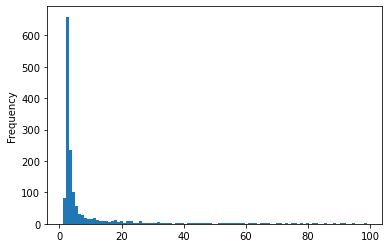

In [64]:
asset_freq = stage1_raw_timeStamp.groupby("SessionVisitorId")["BingeScoredAssetPath"].size()
print("describe: ", asset_freq.describe())
asset_freq[(100>asset_freq) & (asset_freq>0)].plot(kind='hist', bins=100)
# asset_freq[(asset_freq>100)].plot(kind='hist', bins=100)

##### ElqID unit

In [65]:
stage1_raw_timeStamp.groupby("DateTime_UTC").size().sort_values()

DateTime_UTC
2022-06-13 10:49:04+05:30    1
2022-11-01 20:58:35-04:00    1
2022-11-01 20:58:31-04:00    1
2022-11-01 20:58:25-04:00    1
2022-11-01 20:58:21-04:00    1
                            ..
2022-11-01 17:14:50-04:00    2
2022-11-10 12:07:23+05:30    2
2022-10-16 21:35:34-04:00    2
2022-08-30 00:54:13-07:00    2
2022-10-19 17:39:48-04:00    2
Length: 22225, dtype: int64

describe:  count     318.000000
mean       35.481132
std       169.248584
min         1.000000
25%         2.000000
50%         4.000000
75%        13.000000
max      2269.000000
Name: BingeScoredAssetPath, dtype: float64


<AxesSubplot:ylabel='Frequency'>

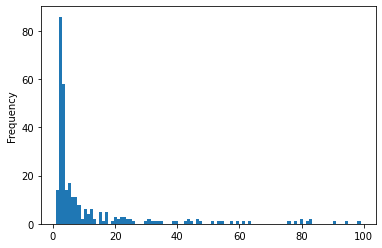

In [66]:
asset_freq = stage1_raw_timeStamp.groupby("EloquaContactId")["BingeScoredAssetPath"].size()
print("describe: ", asset_freq.describe())
asset_freq[(100>asset_freq) & (asset_freq>0)].plot(kind='hist', bins=100)
# asset_freq[(asset_freq>100)].plot(kind='hist', bins=100)

#### session check
- SessionVisitorId

In [67]:
sample1 = dt[dt['SessionVisitorId'].isin(dt['SessionVisitorId'].sample(2,random_state=1))]
sample1.dropna(subset=["BingeId"]).head(30).style

,SessionVisitorId,VisitStartDateTime,VisitPageNumber,VisitNumber,NewVisit,EventList,ExcludeHit,HitSource,DateTime_UTC,PageURL,PageName,VisitReferrer,VisitReferrerType,VisitorDomain,IPaddress,Language,PageType,ContentType,UTM_Source,UTM_Medium,UTM_Campaign,UTM_Content,UTM_Term,VideoName,FileDownload,FileType,FileCategory,GatedContentURL,GatedContentFormType,GatedContentFormName,External_Id,External_Company,External_Audience,External_AudienceSegment,External_Address,External_City,External_StateProv,External_PostalCode,External_Country,External_Industry,External_SubIndustry,External_SIC,External_Website,External_BusPhone,External_NAICS,EloquaContactId,EloquaGUID,mcvisid,GeoCity,GeoCountry,GeoDMA,GeoRegion,GeoPostalCode,Post_PostalCode,Post_PageName,Post_PageURL,UploadedAt,PDFurl,PDFtitle,PDFpagecount,BingeId,BingeName,BingeCriticalScore,BingeCampaignId,BingeScoredAsset,BingeScoredAssetPath,BingeScoredAssetScore
0,941465578065234435_1037759526437180583,2022-11-20 23:24:27,108,69,False,"215,216=18.00,10035,10036,10037,10038,10039,113",0,1,2022-11-20 23:49:00+09:00,https://www.rockwellautomation.com/en-us/company/events/in-person-events/automation-fair/virtual-experience/smart-manufacturing.html,rockwellautomation:company:events:in-person-events:automation-fair:virtual-experience:smart-manufacturing,nan,6,nttpc.ne.jp,1.33.250.15,186,nan,event-in-person,nan,nan,nan,nan,nan,c725ca19-e87b-46b1-8b67-230ec6da148a,nan,nan,nan,nan,HighGate,Contact Us Automation Fair On Demand 2022 Binge Experience,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CRACP000015356002,nan,13216869107294672690736265945025596341,tokyo,jpn,392001,13,100-0001,::hash::0,nan,nan,2022-11-21 16:06:37.297,nan,nan,nan,be1667336395036164,Smart Manufacturing,2.000000,CMP-05108-D0V3T8,Teams Work Better Together with FactoryTalk Design Hub,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-design-hub-teams-work-better-together/factorytalk-design-hub-teams-work-better-together-en.mp4,2.000000
1,941465578065234435_1037759526437180583,2022-11-20 23:24:27,99,69,False,"215,216=35.00,10035,10036,10037,10038,10039,113",0,1,2022-11-20 23:48:12+09:00,https://www.rockwellautomation.com/en-us/company/events/in-person-events/automation-fair/virtual-experience/technology-services.html,rockwellautomation:company:events:in-person-events:automation-fair:virtual-experience:technology-services,nan,6,nttpc.ne.jp,1.33.250.15,186,nan,event-in-person,nan,nan,nan,nan,nan,36a271db-8418-4c49-909f-155c15a28cb0,nan,nan,nan,nan,NoGate,Expo On Demand - Technology & Services AF2022 Binge Experience,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CRACP000015356002,nan,13216869107294672690736265945025596341,tokyo,jpn,392001,13,100-0001,::hash::0,nan,nan,2022-11-21 16:06:37.297,nan,nan,nan,be1667920230989108,Technology & Services Virtual Tours,2.000000,CMP-05108-D0V3T8,Teams Work Better Together with FactoryTalk Design Hub,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-design-hub-teams-work-better-together/factorytalk-design-hub-teams-work-better-together-en.mp4,2.000000
2,941465578065234435_1037759526437180583,2022-11-20 23:24:27,98,69,False,"263,159,160,161,162,113",0,1,2022-11-20 23:48:11+09:00,https://www.rockwellautomation.com/en-us/company/events/in-person-events/automation-fair/virtual-experience/technology-services.html,rockwellautomation:company:events:in-person-events:automation-fair:virtual-experience:technology-services,nan,6,nttpc.ne.jp,1.33.250.15,186,nan,event-in-person,nan,nan,nan,nan,nan,36a271db-8418-4c49-909f-155c15a28cb0,nan,nan,nan,nan,NoGate,Expo On Demand - Technology & Services AF2022 Binge Experience,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CRACP000015356002,nan,13216869107294672690736265945025596341,tokyo,jpn,392001,13,100-0001,::hash::0,nan,nan,2022-11-21 16:06:37.297,nan,nan,nan,be1667920230989108,Technology & Services Virtual Tours,2.000000,CMP-05108-D0V3T8,Teams Work Bett

In [68]:
session = dt[~(dt["BingeId"].isnull() | dt["BingeScoredAssetPath"].isnull()) ].reset_index(drop=True)

In [69]:
# target_eventlist = ",125"
# stage1_raw["SubmitGatedForm"] = ((stage1_raw["EventList"].str.contains(",125")) | (stage1_raw["EventList"].str.contains(",126"))) * 1

In [70]:
session.groupby(["BingeName","BingeScoredAsset"]).size().to_frame()

0
BingeName                           BingeScoredAsset                                      
Digital Engineering and Design      Introduction to FactoryTalk Optix Visualization...   2
                                    Teams Work Better Together with FactoryTalk Des...   2
                                    What is New and Next at Rockwell Automation          2
Smart Manufacturing                 Teams Work Better Together with FactoryTalk Des...   1
Technology & Services Virtual Tours Teams Work Better Together with FactoryTalk Des...  19

In [71]:
session.groupby("SessionVisitorId").size().sort_values()

SessionVisitorId
941465578065234435_1037759526437180583    26
dtype: int64

In [72]:
session[["BingeId","BingeName"]].drop_duplicates()

,BingeId,BingeName
0,be1667336395036164,Smart Manufacturing
1,be1667920230989108,Technology & Services Virtual Tours
20,be1667335927367622,Digital Engineering and Design


In [73]:
session.groupby(["BingeId","BingeScoredAssetPath"])["BingeScoredAssetPath"].count().to_frame()

BingeScoredAssetPath
BingeId            BingeScoredAssetPath                                                    
be1667335927367622 /content/dam/rockwell-automation/videos/events/...                     2
                   /content/dam/rockwell-automation/videos/product...                     2
                   /content/dam/rockwell-automation/videos/product...                     2
be1667336395036164 /content/dam/rockwell-automation/videos/product...                     1
be1667920230989108 /content/dam/rockwell-automation/videos/product...                    19

In [74]:
session["SubmitGatedForm"] = ((session["EventList"].str.contains(",125")) | (session["EventList"].str.contains(",126"))) * 1

In [75]:
session = stage1_raw[stage1_raw["SessionVisitorId"] =="6602654418054790101_6995911924734904364"]

In [76]:
target_event = [125, 126]
events = ",".join(session["EventList"].drop_duplicates().tolist())
y = any([True for e in target_event if "," + str(e) in events])

In [77]:
# stage1_raw.groupby(["SessionVisitorId", "BingeScoredAssetPath"]).size().to_frame()
page_view = session.groupby(["BingeScoredAssetPath"])[["BingeScoredAssetPath"]].count()
page_view

,BingeScoredAssetPath
BingeScoredAssetPath,
/content/rockwell-automation/www/na/us/en_US/company/news/presentations/electric-vehicle-innovation-center.html,703


In [78]:
init_scores = session.groupby(["BingeScoredAssetPath"])[["BingeCriticalScore","BingeScoredAssetScore"]].mean()
init_scores

,BingeCriticalScore,BingeScoredAssetScore
BingeScoredAssetPath,,
/content/rockwell-automation/www/na/us/en_US/company/news/presentations/electric-vehicle-innovation-center.html,2.0,2.0


In [79]:
asset_session_seq = session.sort_values(by="DateTime_UTC")["BingeScoredAssetPath"].tolist()
asset_session_seq

['/content/rockwell-automation/www/na/us/en_US/company/news/presentations/electric-vehicle-innovation-center.html',
 '/content/rockwell-automation/www/na/us/en_US/company/news/presentations/electric-vehicle-innovation-center.html',
 '/content/rockwell-automation/www/na/us/en_US/company/news/presentations/electric-vehicle-innovation-center.html',
 '/content/rockwell-automation/www/na/us/en_US/company/news/presentations/electric-vehicle-innovation-center.html',
 '/content/rockwell-automation/www/na/us/en_US/company/news/presentations/electric-vehicle-innovation-center.html',
 '/content/rockwell-automation/www/na/us/en_US/company/news/presentations/electric-vehicle-innovation-center.html',
 '/content/rockwell-automation/www/na/us/en_US/company/news/presentations/electric-vehicle-innovation-center.html',
 '/content/rockwell-automation/www/na/us/en_US/company/news/presentations/electric-vehicle-innovation-center.html',
 '/content/rockwell-automation/www/na/us/en_US/company/news/presentation

### stage2

In [80]:
stage2_raw[["SessionVisitorId", "EloquaContactId","BingeId", "GatedContentFormType", "BingeScoredAssetPath"]].nunique()

SessionVisitorId        331
EloquaContactId         318
BingeId                   8
GatedContentFormType      5
BingeScoredAssetPath     39
dtype: int64

In [81]:
asset_freq = stage2_raw.groupby("SessionVisitorId")["BingeScoredAssetPath"].size()
print("describe: ", asset_freq.describe())

describe:  count     331.000000
mean       34.087613
std       109.405840
min         1.000000
25%         2.000000
50%         4.000000
75%        15.000000
max      1259.000000
Name: BingeScoredAssetPath, dtype: float64


## ELQ

In [134]:
# _elq = pd.read_csv("all_elo_data_TOP1000000_2022-10-16.csv", nrows=1000000, index_col=0)
_elq = pd.read_csv("elq_all_bridge-only.csv", index_col=0)
elq = email_cleanup(_elq, "EmailAddress")
elq_bridge = elq[["EmailAddress", "EloquaContactId"]]


/Users/wy/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [84]:
# elq.groupby("EmailAddress").size().sort_values()

#### Extra resource

In [85]:
# elq_binge = pd.read_excel("elq_binge_all.xlsx", index_col=0)
# print(elq_binge.shape)
# elq_binge.head().style

#### checking case

In [86]:
elq_bridge = elq[["EmailAddress", "EloquaContactId"]]
# elq_bridge.groupby("EmailAddress").size().sort_values()[-10::]

In [87]:
elq[elq["EmailAddress"].isin(elq_bridge.groupby("EmailAddress").size().sort_values()[-9:-1].index)].sort_values(by="EmailAddress").style

,EloquaContactId,EmailAddress
2626344,CRACP000003003915,fgerala@ceramicadelnorte.com
2626371,CRACP000008024317,fgessullo@corporate.ford.com
2626372,CRACP000014586663,fgestring@soprema.us
2626374,CRACP000011362721,fgetchell@crowncork.com
2626375,CRACP000011958096,fgetty@gettyimages.com
2626376,CRACP000012370867,fgevaux@parker.com
2626381,CRACP000013697286,fgfalcon@pella.com
2626382,CRACP000015447637,fgfcubaf.zbedufggv@febzfg.dbz


In [88]:
# elq[["SubscribedtoChannelEnews"]].fillna("NAN").value_counts()

In [89]:
# elq[["EmailMarketingStatus"]].fillna("NAN").value_counts()

In [90]:
# elq[["InboundMarketingStatus"]].fillna("NAN").value_counts()

In [91]:
# b = elq[["Persona",
# "PersonaType",
# "PersonaLevel",
# "Company",
# "Industry",
# "JobFunction",
# "JobLevel",
# "JobTitle",
# "DemandBaseCompany",
# "ContactIndustryVertical",
# "ContactCustomerType",
# "BusinessPhone",
# "BusinessWebsite",
# "CalculatedIndustryVertical",
# "CalculatedCustomerType",
# ]].dropna()


In [92]:
# elq[["ConversionDateOriginal", "ConversionSourceRecentDate"]]

In [93]:
# elq["MarketableAttributesRating"]

## <font color=blue>Relationship</font>
- elq table is the bridge table to connect AEM.raw to CRM lead
```SQL
SELECT 
    contact.EloquaContactId
    contact.EmailAddress,
        contact.FirstName,
        contact.LastName,
        contact.Company,        

    binge.EloquaContactId,
    binge.BingeId,
    binge.VisitStartDateTime,
    binge.EventList,
        binge.PageURL,
        binge.PageName,
        binge.BingeName,
        binge.BingeCampaignId,
        binge.BingeCriticalScore,
        binge.BingeScoredAsset,
        binge.BingeScoredAssetPath,
        binge.BingeScoredAssetScore,
        binge.PDFurl,
        binge.PDFtitle,
        binge.PDFpagecount,
        binge.UTM_Source,
        binge.UTM_Medium,
        binge.UTM_Campaign,
        binge.UTM_Content,
        binge.UTM_Term

    lead.emailaddress1
    lead.createdon
        lead.ra_leadstage,
        # lead.ra_leadstagename,
        lead.ra_teleacceptedname,
        lead.ra_telequalifiedname,
        lead.ra_salesacceptedname,
        lead.ra_salesqualifiedname,
        lead.statecode,
        # lead.statecodename,
        lead.statuscode,
        # lead.statuscodename
FROM aem.RawTraffic AS binge 
    LEFT JOIN elo.Contact AS contact ON binge.EloquaContactId = contact.EloquaContactId
    LEFT JOIN crm.Lead AS lead ON lead.emailaddress1 = contact.EmailAddress

```

In [94]:
def identify_pos(track, label_type = 2):
    if label_type == 1:
        pos_code_statuscode = [953810011.0, 3.0, 953810008.0]
        isPos = track["statuscode"].isin(pos_code_statuscode).any()
    elif label_type == 2:
        pos_code_ra_leadstage = [6.0, 7.0, 8.0]
        isPos = track["ra_leadstage"].isin(pos_code_ra_leadstage).any()
    return isPos

crm_qualify_label = crm_lead.groupby("emailaddress1").apply(lambda track: identify_pos(track, label_type = 2))
crm_qualify_label = crm_qualify_label.to_frame().reset_index()
crm_qualify_label.columns = ["emailaddress1", "label"]

In [95]:
qualified_label = elq_bridge.merge(crm_qualify_label, left_on=["EmailAddress"], right_on=["emailaddress1"], how='inner')
qualified_label = qualified_label[["EloquaContactId","label"]]
print("keep rows:", qualified_label.shape)
qualified_label.info()
qualified_label["label"].value_counts()

keep rows: (135182, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 135182 entries, 0 to 135181
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   EloquaContactId  135182 non-null  object
 1   label            135182 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 2.2+ MB


False    133229
True       1953
Name: label, dtype: int64

In [96]:
crm_qualify_label

,emailaddress1,label
0,01032409699@nate.com,False
1,012k.yamazaki@tam-tokyo.co.jp,False
2,017089@cnkh.com,False
3,017215@cnkh.com,False
4,01kim@koenergy.kr,False
...,...,...
135286,zzq4993@163.com,False
135287,zzq516@163.com,False
135288,zzq63@126.com,False
135289,zzwj1009@163.com,False


In [97]:
a = crm_qualify_label["emailaddress1"]
b = elq_bridge["EmailAddress"]
print("a not in b: ", a[~a.isin(b)].shape[0])
print("a && b: ", qualified_label.shape[0])
print("b not in a: ", b[~b.isin(a)].shape[0])


a not in b:  109
a && b:  135182
b not in a:  6218110


In [98]:
def preprocessing_stage(session, stage=1, target_method=0, feature_method="sequential", sep="$"):
    if stage == 1:
        if target_method == 0:
            target_event = [125, 126]
            events = ",".join(session["EventList"].drop_duplicates().tolist())
            y = any([True for e in target_event if "," + str(e) in events]) * 1
        elif target_method == 1:
            y = (~session["EloquaContactId"].isnull()).any()
        else:
            raise "no such target_method"
            
    elif stage == 2:
        y = any(session["label"]) * 1
    
    if feature_method == "bow":
        page_view = session.groupby("BingeScoredAssetPath")["BingeScoredAssetPath"].size().to_dict() # dict vectorizer
    elif feature_method == "sequential":
        page_view = sep.join(session.sort_values(by="DateTime_UTC")["BingeScoredAssetPath"].tolist())
    else:
        raise "no such feature_method"
    
    # init_scores = session.groupby(["BingeScoredAssetPath"])[["BingeCriticalScore","BingeScoredAssetScore"]].mean() # not sure how to append as weighted matrix
#     asset_session_seq = session.sort_values(by="DateTime_UTC")["BingeScoredAssetPath"].tolist()
    return pd.Series([page_view, y], index=["features", "label"])

In [99]:
# _data = stage1_raw.merge(qualified_label, on="EloquaContactId")
# data = _data.groupby("SessionVisitorId").apply(lambda x: processing2(x))

In [135]:
# data = stage1_raw.groupby("SessionVisitorId").apply(lambda x: preprocessing_stage(x, stage=2))

#### EloquaContactId join loss

In [100]:
unique_aem = stage1_raw[["EloquaContactId"]].drop_duplicates()
print("aem raw original size:", unique_aem.shape)


_data3 = unique_aem.merge(elq, on="EloquaContactId")
print("before drop N/A email + join with stage1_raw: ", _data3.shape)

_data2 = unique_aem.merge(elq_bridge, on="EloquaContactId")
print("after drop N/A email + join with stage1_raw: ", _data2.shape)

_data = unique_aem.merge(qualified_label, on="EloquaContactId")
print("after drop N/A email + join with CRM Lead with existing Email + join with stage1_raw: ", _data.shape)


aem raw original size: (319, 1)
before drop N/A email + join with stage1_raw:  (318, 2)
after drop N/A email + join with stage1_raw:  (308, 2)
after drop N/A email + join with CRM Lead with existing Email + join with stage1_raw:  (33, 2)


In [101]:
stage1_raw[["EloquaContactId"]]

,EloquaContactId
0,NaN
1,NaN
2,NaN
3,CRACP000000122266
4,CRACP000000122266
...,...
23817,NaN
23818,NaN
23819,NaN
23820,CRACP000000774122


#### Mis-matched EloquaContactId

In [102]:
data_unique_elqID = stage2_raw["EloquaContactId"].drop_duplicates()
loss_elqID = data_unique_elqID[~data_unique_elqID.isin(qualified_label["EloquaContactId"])]
loss_elqID_email = elq[elq["EloquaContactId"].isin(loss_elqID)]["EmailAddress"]
target_email = elq[elq["EloquaContactId"].isin(data_unique_elqID)]
loss_elqID.shape

(285,)

In [103]:
target_email["isExist_in_CRM_LEAD"] = target_email["EmailAddress"].isin(crm_lead["emailaddress1"])
target_email.to_excel("target_email_diff.xlsx")

/var/folders/m3/j96s4t5d61sf6yx946mnlp_h0000gn/T/ipykernel_23693/1179527084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_email["isExist_in_CRM_LEAD"] = target_email["EmailAddress"].isin(crm_lead["emailaddress1"])


In [104]:
crm_lead["emailaddress1"]

0.0                    sustarg@milwaukeeforge.com
1.0         teerapanluengnaruemitchai@thaibev.com
2.0                       tim.parks@whitepath.com
3.0                  sherman.wagner@silganpfc.com
4.0                     miguel.chavez2@sbdinc.com
                            ...                  
254485.0                     michelle@satnusa.com
254486.0           dipalma@dws-suedwollegroup.com
254487.0                silvain.desard@equans.com
254488.0                    joseph@fongspl.com.sg
254489.0                  weiliang.yang@bayer.com
Name: emailaddress1, Length: 183763, dtype: object

In [105]:
# !pip install fuzzywuzzy
from fuzzywuzzy import fuzz

def find_most_similar_email(x, source):
#     sim = source.apply(lambda y: fuzz.ratio(x, y)).sort_values().iloc[0:5]
    a = source["emailaddress1"].apply(lambda y: fuzz.ratio(x, y)).sort_values().iloc[-5::]
    return source["emailaddress1"].loc[a.index].reset_index(drop=True)


samples = target_email[target_email["isExist_in_CRM_LEAD"]==False].iloc[:5]
aa = samples["EmailAddress"].apply(lambda x: find_most_similar_email(x, crm_lead))

/Users/wy/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [106]:
samples["EmailAddress"]

55232                       16309088jpr@gmail.com
207210                           625214727@qq.com
283491             aaron.nielson@tdwilliamson.com
295664    Abdolrhman.Ahmed@rockwellautomation.com
304352                 abigail.martinez@proci.com
Name: EmailAddress, dtype: object

### index on raw
- no range match index for 
    - UploadedAt

In [107]:
# # Table indices
# table_name = 'Staging.aem.RawTraffic'
# query_db(
#     """
#     SELECT
#         i.name,
#         COL_NAME(c.object_id, c.column_id)
#     FROM
#         sys.indexes AS i,
#         sys.index_columns AS c
#     WHERE i.object_id = c.object_id
#         AND i.index_id = c.index_id
#         AND i.object_id = OBJECT_ID(?)
#     """,
#     [table_name]
# )


### extra Info

#### rawTraffic_uploadedAt

In [108]:
index_uploadAt = pd.read_csv("rawTraffic_uploadedAt.csv", nrows=1000)
x = pd.to_datetime(index_uploadAt["UploadedAt"]).dt.date.astype(str).value_counts()
x = x.reset_index().rename(columns={"index":"date"})
# index_uploadAt = x[x["UploadedAt"]<2]
x

,date,UploadedAt
0,2021-12-28,7
1,2021-12-29,5
2,2021-12-23,3
3,2022-05-19,2
4,2022-05-11,2
...,...,...
288,2022-10-23,1
289,2022-10-07,1
290,2022-09-30,1
291,2022-09-23,1


#### BINGE + LEAD = AEM + CRM

In [109]:
binge_lead_tmp = pd.read_csv("binge_leads_2022_09_28.csv", nrows=1000, index_col=0)
binge_lead_tmp.head(10).T.style

,0,1,2,3,4,5,6,7,8,9
EmailAddress,agarcia@metrikalab.com.mx,alberto.simbahon@stelco.com,alec.stull@cmcmaterials.com,alex.fonseca@ingredion.com,anders.l.johansson@profilgruppen.se,andrewbriones@kennedyjenks.com,aneely@oceaneering.com,arosa@bama.com,arturo.quispe@incontrolgroup.com,atanvir@mcg-pyle.com
ra_leadstage,1,4,5,5,5,4,4,5,4,5
BingeId,be1650550449644850,be1650550449644850,be1650550449644850,be1650550449644850,be1650550449644850,be1650550449644850,be1650550449644850,be1650550449644850,be1650550449644850,be1650550449644850
BingeName,Basic Functionality Labs,Basic Functionality Labs,Basic Functionality Labs,Basic Functionality Labs,Basic Functionality Labs,Basic Functionality Labs,Basic Functionality Labs,Basic Functionality Labs,Basic Functionality Labs,Basic Functionality Labs
BingeCampaignId,builder_labs,builder_labs,builder_labs,builder_labs,builder_labs,builder_labs,builder_labs,builder_labs,builder_labs,builder_labs
BingeCriticalScore,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
BingeScoredAsset,nan,nan,nan,nan,"Getting Started in IAB (85 minutes, 121 pages)",nan,nan,nan,nan,nan
BingeScoredAssetPath,nan,nan,nan,nan,/content/dam/rockwell-automation/sites/downloads/pdf/Getting Started in IAB.pdf,nan,nan,nan,nan,nan
BingeScoredAssetScore,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan


## Statistics estimation
- Margin of Error = confidence interval(https://en.wikipedia.org/wiki/Margin_of_error)
    - The power of a hypothesis test = 1 – beta = Minimum Detectable Effect (MDE) ，即最小检测效应，也称检验灵敏度。
- When you estimate a population parameter, you compute a confidence interval after taking sample data. Based on the confidence level that you preselect, and characteristics of your sample or population, compute a margin of error. It usually for estimate the population mean or variance. 


- assumption for naive bayes
    1. normal distribution
    2. features are conditional independent -> assets are not correlated
    3. <font color=red>conversion rate from CRM lead for prior 1953:133229</font>

- preset
    - alpha_level = 0.05 = type I error rate 
        - <img src="https://static.wingify.com/gcp/uploads/sites/3/2020/12/type-1-and-type-2-errors.png" width="400"/>
    - error_width = 0.01
        - <img src="http://www.analyzemath.com/probabilities/calculators/interval-of-confidence-normal-dsitribution-graph.png" width="400"/>
    
- target
    - given error_width, estimate minimum required sample size -> to estimate the Naive bayesian model params
    
    
- reference:
    - https://towardsdatascience.com/information-planning-and-naive-bayes-380ee1feedc7
    - https://brownmath.com/stat/sampsiz.htm
    - https://www.cs.mcgill.ca/~rwest/wikispeedia/wpcd/wp/m/Margin_of_error.htm
    - https://zhuanlan.zhihu.com/p/346602966#:~:text=Minimum%20Detectable%20Effect%20(MDE)%20%EF%BC%8C,%E6%95%88%E5%BA%94%EF%BC%8C%E4%B9%9F%E7%A7%B0%E6%A3%80%E9%AA%8C%E7%81%B5%E6%95%8F%E5%BA%A6%E3%80%82
    - 6. 校验灵敏度MDE
            MDE是什么 ：Minimum Detectable Effect (MDE)，最小可检测单位，即检验灵敏度，是实验在当前条件下能有效检测的指标diff幅度。当前条件，指当前样本量，指标值和指标分布情况，并假设样本方差与总体指标方差足够接近。有效检测，指检出概率大于等于80%（type II error小于等于20%）。
            MDE可以用来做什么 ：通过比较指标MDE与指标的目标提升率，来判断不显著的指标结论是否solid，可以避免实验在灵敏度不足的情况下被过早作出非显著结论而结束，错失有潜力的feature。
            如何设置 ：MDE越小，意味着您要求测试的灵敏度越高，所需的样本量也越大。如果MDE设置过于精细，不仅会浪费不必要的流量，同时实际收益可能不能弥补新策略的研发和推广成本。灵敏度不足（比如预期1%就达标，但实验灵敏度仅能检测5%及以上），可能会导致错失有潜力的feature。

In [110]:
alpha_level = 0.05
error_width = 0.01


### estimate for params


### sample size for binomial distribution - conversion ratio
Since {\displaystyle \max \sigma _{P}^{2}=\max P(1-P)=0.25}{\displaystyle \max \sigma _{P}^{2}=\max P(1-P)=0.25} at {\displaystyle p=0.5}p=0.5, we can arbitrarily set {\displaystyle p={\overline {p}}=0.5}{\displaystyle p={\overline {p}}=0.5}, calculate {\displaystyle \sigma _{P}}{\displaystyle \sigma _{P}}, {\displaystyle \sigma _{\overline {p}}}{\displaystyle \sigma _{\overline {p}}}, and {\displaystyle z_{\gamma }\sigma _{\overline {p}}}{\displaystyle z_{\gamma }\sigma _{\overline {p}}} to obtain the maximum margin of error for {\displaystyle P}P at a given confidence level {\displaystyle \gamma }\gamma  and sample size {\displaystyle n}n, even before having actual results.  With {\displaystyle p=0.5,n=1013}{\displaystyle p=0.5,n=1013}

- ref: https://www.itl.nist.gov/div898/handbook/prc/section2/prc242.htm
- for estimate conversion ratio width: this conversion rate is fairly accurate = p0

- <img src="https://images.slideplayer.com/24/7268811/slides/slide_10.jpg" width="400"/>
- conclusion
    - How large of a sample is needed for a 95% confidence interval to have a margin of error of no more than 4%? 
        - E = 0.04
    - conversion ratio is changed or not

In [111]:
E = 0.04

In [112]:
prior_ratio = 1953/133229
p = prior_ratio
def estimate_size(p, E):
    return p*(1-p)*(1.96/E)**2

estimate_size(p, E)

34.680248623237375

In [113]:
current_ratio = 5/33
p = current_ratio
estimate_size(p, E)

308.66850321395776

#### conservative case
- prior = 0.5

In [114]:
p = 0.5
estimate_size(p, E)

600.25

### Chi-squared test
- estimate for different class
    - do they have difference preference between qualify lead and non-qualify lead? prior prob = 1953:133229

- test there is a significance different between two classes first

- e.g.
    - 公司采用了新的网页页面B，相较于旧版页面A，网民更喜欢哪一种页面？
    - 原因在于它们都是有关总体比例的问题。我们只是将个体分类，并想知道每个类别中的总体比例。它检验的内容仅涉及一个因素多项分类的计数资料，检验的是单一变量在多项分类中实际观察次数分布与某理论次数是否有显著差异。

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [116]:
v = DictVectorizer(sparse=False)
X_train_arr = v.fit_transform(data["page_view"])

In [117]:
TF = pd.DataFrame(X_train_arr, columns=v.feature_names_)
D = pd.concat([data[["label"]].reset_index(drop=True), TF ], axis=1)

In [118]:
D.groupby("label").sum()

,/content/dam/rockwell-automation/sites/downloads/pdf/Applying Pricing to BOM.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/Export a BOM to ProposalWorks.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/Generating a Report.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/Getting Started in IAB.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/Project Design Assistant.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/Using the Architecture View.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/auto-sp010_-en-p.pdf,/content/dam/rockwell-automation/videos/capabilities/industrial-automation-and-control/micro-control-integrated-automation-solution/micro-control-integrated-automation-solution-en.mp4,/content/dam/rockwell-automation/videos/capabilities/mes-solutions/overview-of-plex-systems-smart-manufacturing-platform/overview-of-plex-systems-smart-manufacturing-platform-en.mp4,/content/dam/rockwell-automation/videos/capabilities/process-solutions/plantpax-system-now-and-in-the-future/plantpax-system-now-and-in-the-future-en.mp4,/content/dam/rockwell-automation/videos/events/af-2022/on-demand/new-and-next-at-rockwell-automation/new-and-next-at-rockwell-automation-en.mp4,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-design-hub-ecosystem-introduction/factorytalk-design-hub-ecosystem-introduction-en.mp4,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-design-studio-cloud-increase-design-efficiency/factorytalk-design-studio-cloud-increase-design-efficiency-en.mp4,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-optix-visualization-platform-introduction/factorytalk-optix-visualization-platform-introduction-en.mp4,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-remote-access-overview-architectures-options/factorytalk-remote-access-overview-architectures-options-en.mp4,/content/rockwell-automation/www/na/us/en_US/company/news/case-studies/hirata-emulation-software.html
label,,,,,,,,,,,,,,,,
0,15.0,14.0,7.0,86.0,12.0,12.0,3.0,2.0,2.0,3.0,11.0,0.0,2.0,2.0,2.0,2.0
1,0.0,0.0,0.0,12.0,68.0,2.0,0.0,0.0,0.0,0.0,23.0,20.0,28.0,2.0,0.0,0.0


In [119]:
D.sum()

label                                                                                                                                                                                                  5.0
/content/dam/rockwell-automation/sites/downloads/pdf/Applying Pricing to BOM.pdf                                                                                                                      15.0
/content/dam/rockwell-automation/sites/downloads/pdf/Export a BOM to ProposalWorks.pdf                                                                                                                14.0
/content/dam/rockwell-automation/sites/downloads/pdf/Generating a Report.pdf                                                                                                                           7.0
/content/dam/rockwell-automation/sites/downloads/pdf/Getting Started in IAB.pdf                                                                                                             

### minimum asset size to cover all asset
- n = 5 / (the smallest proportion in your model)

In [120]:
total_asset_view = D[D.columns.tolist()[1::]].sum().sum()
minimum = 1/total_asset_view
print("all of the expected counts must be ≥5, then expected asset views by qualify lead: ", round(5/minimum))

all of the expected counts must be ≥5, then expected asset views by qualify lead:  1650


### minimum lead size

In [121]:
round(5/prior_ratio)+1

342

### population proportion
- submit and not submit ratio prior estimation?
    - https://brownmath.com/stat/sampsiz.htm#Case5
    
    
- Example 3: What percent of the voters would vote for your candidate if the election were held today? You want 95% confidence in your answer, with a margin of error no more than 3.5%. Last month’s poll showed your candidate had 42% support. How many voters do you need to survey?
    - True or False

- a given margin of error E

In [122]:
5/(1953/133229)

341.08806963645674

In [123]:
crm_lead

,accountid,accountidname,address1_addressid,address1_addresstypecode,address1_addresstypecodename,address1_city,address1_country,address1_county,address1_fax,address1_latitude,...,transactioncurrencyid,transactioncurrencyidname,utcconversiontimezonecode,websiteurl,owningbusinessunitname,ra_integrationsource,ra_integrationsourcename,ra_externalrecordid,ra_externalreroute,ra_externalreroutename
0.0,NaN,NaN,865286E1-4E0E-4F9C-BDC7-14FA231A5529,1.0,Default Value,Milwaukee,USA,NaN,NaN,NaN,...,2F283B3B-EA62-E611-80E0-C4346BAC8A9C,Dollar,NaN,NaN,NA - SOUTHWEST,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,A650131C-38D5-4C8B-A180-A362BECE88A7,1.0,Default Value,Chomphon,TH /,NaN,NaN,NaN,...,2F283B3B-EA62-E611-80E0-C4346BAC8A9C,Dollar,NaN,NaN,AP,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,E8CFA10C-52DF-489E-A977-702231CD514F,1.0,Default Value,NaN,NaN,NaN,NaN,NaN,...,2F283B3B-EA62-E611-80E0-C4346BAC8A9C,Dollar,NaN,NaN,NA - SOUTHWEST,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,DBA40E91-AFE7-46AB-BF13-012A87408A54,1.0,Default Value,NaN,NaN,NaN,NaN,NaN,...,2F283B3B-EA62-E611-80E0-C4346BAC8A9C,Dollar,NaN,NaN,NA - CENTRAL,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,7220A63F-86E9-4D0B-9BDE-F7C0C9E58743,1.0,Default Value,NaN,NaN,NaN,NaN,NaN,...,2F283B3B-EA62-E611-80E0-C4346BAC8A9C,Dollar,NaN,NaN,NA - CENTRAL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254485.0,NaN,NaN,F39C3292-C527-47BC-98BB-39C2CD526A53,1.0,Default Value,NaN,NaN,NaN,NaN,NaN,...,2F283B3B-EA62-E611-80E0-C4346BAC8A9C,Dollar,NaN,NaN,AP,NaN,NaN,NaN,NaN,NaN
254486.0,NaN,NaN,E03140FC-7D02-4E78-88F8-F508442BBC5E,1.0,Default Value,Dalat City,NaN,NaN,NaN,NaN,...,2F283B3B-EA62-E611-80E0-C4346BAC8A9C,Dollar,NaN,NaN,AP,NaN,NaN,NaN,NaN,NaN
254487.0,NaN,NaN,4D541AD8-B2DE-42EC-9E9E-34959B93DA5F,1.0,Default Value,ORLEANS,FR /,NaN,NaN,NaN,...,2F283B3B-EA62-E611-80E0-C4346BAC8A9C,Dollar,NaN,NaN,EMEA,NaN,NaN,NaN,NaN,NaN
254488.0,NaN,NaN,11A31F75-8D21-4149-B52B-270B6A9DB807,1.0,Default Value,Singapore,Singapore,NaN,NaN,NaN,...,2F283B3B-EA62-E611-80E0-C4346BAC8A9C,Dollar,NaN,NaN,AP,NaN,NaN,NaN,NaN,NaN


### average visited asset 
- for each asset?
- then find the minimum?

In [124]:
D

,label,/content/dam/rockwell-automation/sites/downloads/pdf/Applying Pricing to BOM.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/Export a BOM to ProposalWorks.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/Generating a Report.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/Getting Started in IAB.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/Project Design Assistant.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/Using the Architecture View.pdf,/content/dam/rockwell-automation/sites/downloads/pdf/auto-sp010_-en-p.pdf,/content/dam/rockwell-automation/videos/capabilities/industrial-automation-and-control/micro-control-integrated-automation-solution/micro-control-integrated-automation-solution-en.mp4,/content/dam/rockwell-automation/videos/capabilities/mes-solutions/overview-of-plex-systems-smart-manufacturing-platform/overview-of-plex-systems-smart-manufacturing-platform-en.mp4,/content/dam/rockwell-automation/videos/capabilities/process-solutions/plantpax-system-now-and-in-the-future/plantpax-system-now-and-in-the-future-en.mp4,/content/dam/rockwell-automation/videos/events/af-2022/on-demand/new-and-next-at-rockwell-automation/new-and-next-at-rockwell-automation-en.mp4,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-design-hub-ecosystem-introduction/factorytalk-design-hub-ecosystem-introduction-en.mp4,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-design-studio-cloud-increase-design-efficiency/factorytalk-design-studio-cloud-increase-design-efficiency-en.mp4,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-optix-visualization-platform-introduction/factorytalk-optix-visualization-platform-introduction-en.mp4,/content/dam/rockwell-automation/videos/products/software/factorytalk/factorytalk-remote-access-overview-architectures-options/factorytalk-remote-access-overview-architectures-options-en.mp4,/content/rockwell-automation/www/na/us/en_US/company/news/case-studies/hirata-emulation-software.html
0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,7.0,0.0,2.0,2.0,2.0,0.0
9,0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## conversion rate difference(AB Test)
- The null hypothesis is tested against the alternative hypothesis which is that the two conversion rates are not equal
- <font color=red>how many sample can shows us that the Binge Experience Component is increasing conversion rate</font>

- For example, if 95% CI for a single conversion rate is equal [0.2,0.8], that means that the true values of this conversion rate are within this interval. In other words, if we could repeat our experiment many times, the observed conversion rates would fall in this interval in 95 per 100 experiments.
- ref:
    - https://www.invespcro.com/blog/calculating-sample-size-for-an-ab-test
    - https://towardsdatascience.com/required-sample-size-for-a-b-testing-6f6608dd330a
    - https://www.stat.ubc.ca/~rollin/stats/ssize/b2.html (need desired or expected proportion)
    - https://www.evanmiller.org/ab-testing/sample-size.html
    
- case
    - The marketer has devised an alternative for a landing page and wants to put this alternative to a test. The original landing page has a known conversion of 4%. The expected conversion of the alternative page is 5%. So the marketer asks the analyst “how large should the sample be to demonstrate with statistical significance that the alternative is better than the original?”
    - it has a sequence of daily number of samples? each day will be a conversion rate samples... (basically estimate the mean of conversion ratio)

### requirement
- need daily traffic -> daily conversion rate

In [125]:
prior_ratio

0.014658970644529343

In [126]:
5/33

0.15151515151515152

In [127]:
elq1 = elq[(~elq["EmailAddress"].str.lower().str.contains("rockwell"))]

In [128]:
a = elq1.groupby(["EmailAddress"]).size().sort_values()

In [129]:
a.iloc[-200::]

EmailAddress
danny.hamilton@kellogg.com       6
herman.gallegos@genmills.com     6
rrulf@completeco.com             6
plawson@aandisco.com             6
jhatton@globalfinishing.com      6
                                ..
c_rudiyono@yahoo.com            15
DIXIE_BVN@HOTMAIL.COM           17
123@YAHOO.COM                   18
eric.dacer@ptcerna.com          20
nancy.cordoba@elvatron.com      20
Length: 200, dtype: int64

In [130]:
kellogg = elq[elq["EmailAddress"] == "danny.hamilton@kellogg.com"]["EloquaContactId"]

In [131]:
kellogg

1836892    CRACP000016008906
1836893    CRACP000010632876
1836894    CRACP000010931131
1836895    CRACP000011878024
1836896    CRACP000012102134
1836897    CRACP000013701769
Name: EloquaContactId, dtype: object

In [132]:
kellogg

1836892    CRACP000016008906
1836893    CRACP000010632876
1836894    CRACP000010931131
1836895    CRACP000011878024
1836896    CRACP000012102134
1836897    CRACP000013701769
Name: EloquaContactId, dtype: object